# DSds 
## michelle.carney@berkeley.edu

inspriation on how to approach this problem taken from Data Science Directed Study group members, including Yiyi and Nia

# Goal


Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months. It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job). In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


# Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience. As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:
* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
* What are the main factors that drive employee churn? Do they make sense? Explain your findings.
* If you could add to this data set just one variable that could help explain employee churn, what would that be?


# Data
We have 1 table downloadable by clicking here. The table is: Columns:
* employee_id : id of the employee. Unique by employee per company
* company_id : company id.
* dept : employee dept
* seniority : number of yrs of work experience when hired
* salary: avg yearly salary of the employee during her tenure within the company
* join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13
* quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('employee_retention_data.csv')

In [4]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


There were two individuals with a seniority that was over 90, so we decieded to remove it. I recommend using a seniority of 60 years, which is more reasonable

In [6]:
data = data[data['seniority'] < 60]

In [7]:
import datetime
d = datetime.date(2011,1,23)
delta = datetime.timedelta(days=1)
all_days = []
while d <= datetime.date(2015,12,13):
    all_days.append(d.strftime("%Y-%m-%d"))
    d += delta

In [8]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [9]:
data.head()


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [10]:
comp_id_unique = sorted(data['company_id'].unique())
comp_id_unique

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Now let's create the table

In [11]:
df = pd.DataFrame()

#for comps in comp_id_unique:
for days in all_days:
    days = datetime.datetime.strptime(days,'%Y-%m-%d')
    new_data = data[(data['join_date'] <= days) | (data['quit_date'] >= days)].groupby(['company_id']).size().reset_index(name='count')
    i = 1
    for index, row in new_data.iterrows():
        while (i != row['company_id']):
            df = df.append({'day': days, 'employee_headcount': 0,'company_id':i}, ignore_index=True)
            i = i + 1
        df = df.append({'day': days, 'employee_headcount': row['count'],'company_id':row['company_id']}, ignore_index=True)
        i = i + 1

In [12]:
df.head(10)


,company_id,day,employee_headcount
0,1.0,2011-01-23,4620.0
1,2.0,2011-01-23,2206.0
2,3.0,2011-01-23,1531.0
3,4.0,2011-01-23,1153.0
4,5.0,2011-01-23,983.0
5,6.0,2011-01-23,712.0
6,7.0,2011-01-23,692.0
7,8.0,2011-01-23,579.0
8,9.0,2011-01-23,529.0
9,10.0,2011-01-23,479.0


company_id
1.0     Axes(0.125,0.125;0.775x0.775)
2.0     Axes(0.125,0.125;0.775x0.775)
3.0     Axes(0.125,0.125;0.775x0.775)
4.0     Axes(0.125,0.125;0.775x0.775)
5.0     Axes(0.125,0.125;0.775x0.775)
6.0     Axes(0.125,0.125;0.775x0.775)
7.0     Axes(0.125,0.125;0.775x0.775)
8.0     Axes(0.125,0.125;0.775x0.775)
9.0     Axes(0.125,0.125;0.775x0.775)
10.0    Axes(0.125,0.125;0.775x0.775)
11.0    Axes(0.125,0.125;0.775x0.775)
12.0    Axes(0.125,0.125;0.775x0.775)
Name: employee_headcount, dtype: object

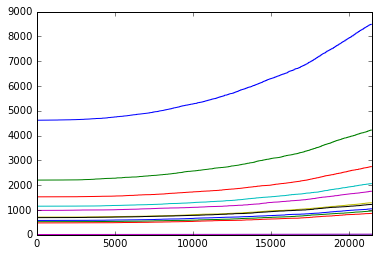

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('company_id')['employee_headcount'].plot()

In [16]:
data.dropna(inplace = True)
#we remove NaT values sicne it means employees did not quit by then

In [15]:
data['employment_length'] = (data['quit_date'] - data['join_date'])/ np.timedelta64(1, 'D')


In [17]:
data.head(10)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578.0
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1047.0
10,892155.0,6,customer_service,13,72000.0,2012-11-12,2015-02-27,837.0
12,939058.0,1,marketing,1,48000.0,2012-12-10,2013-11-15,340.0
13,163427.0,10,marketing,23,154000.0,2012-06-18,2015-09-25,1194.0
14,461248.0,2,sales,20,201000.0,2013-09-16,2014-08-22,340.0


# Companies

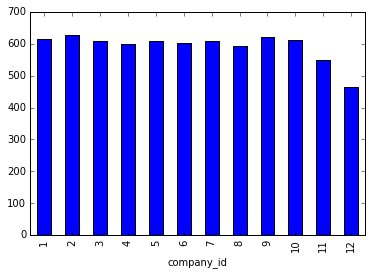

In [18]:
data.groupby('company_id')['employment_length'].mean().plot(kind='bar')


# Departments

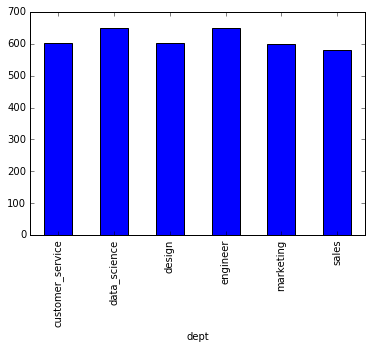

In [19]:
data.groupby('dept')['employment_length'].mean().plot(kind='bar')


# Salary

In [20]:
max(data['salary'])


379000.0

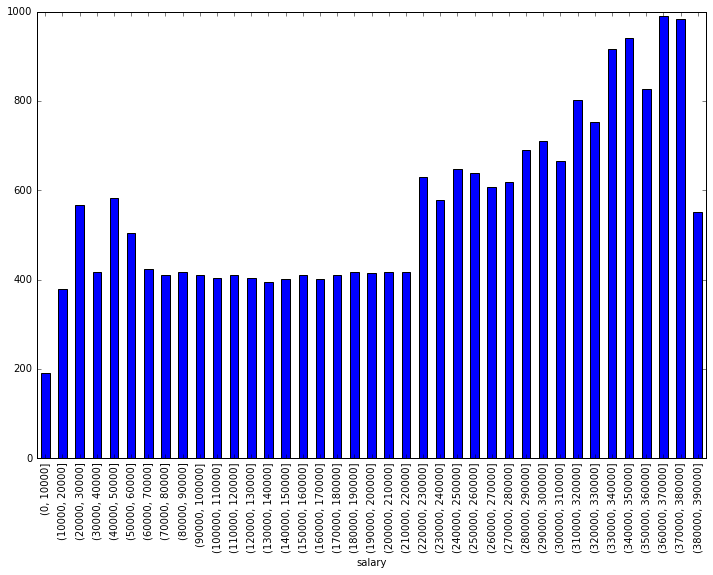

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
salary_range = pd.cut(data['salary'], range(0,400000, 10000))
data.groupby(salary_range)['employment_length'].median().plot(kind='bar')

# Seniority

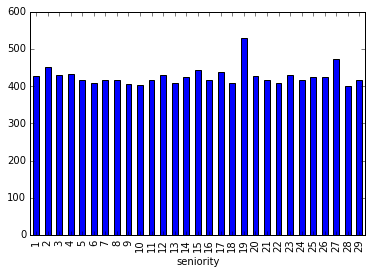

In [22]:
data.groupby('seniority')['employment_length'].median().plot(kind='bar')


There aren't any apparent trends in department or seniority. But, for comapnies 11 and 12, they have low employment rate and also mid salary range employees quit more than low or high salary employees.

# Employment Length

In [23]:
max(data['employment_length'])


1726.0

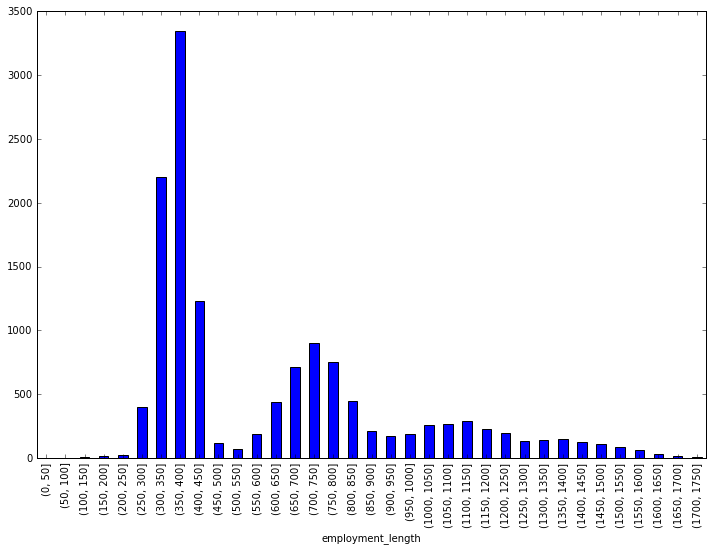

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
emp_length_range = pd.cut(data['employment_length'], range(0,1800, 50))
data.groupby(emp_length_range)['employee_id'].count().plot(kind='bar')

Lot of employees quit after 1st or 2nd or 3rd year. Employees usually wait for a bump in salart before quitting.


# Employee churn prediction by decision tree regressor

In [25]:
data.columns


Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'employment_length'],
      dtype='object')

In [26]:
data['dept_n'] = pd.factorize(data['dept'])[0]


Test r^2 score:  -0.264064093638
RMSE:  372.739850368
[ 0.          0.          0.03871168  0.96128832]
May  7 10:41:58  dot[25781] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
May  7 10:41:58  dot[25781] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.



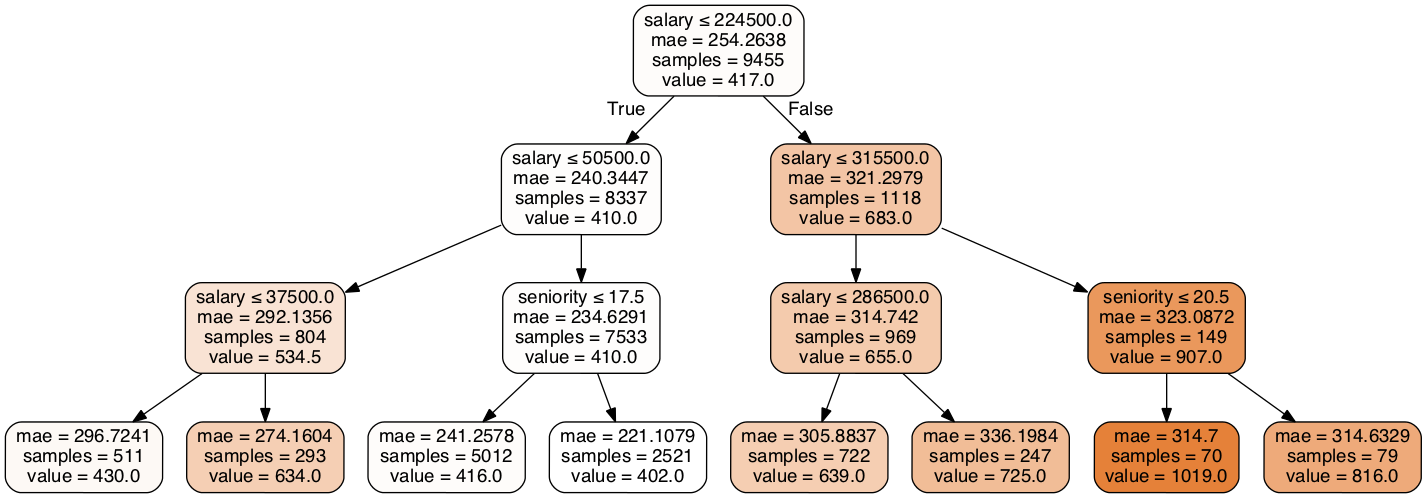

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import pydotplus
from IPython.display import Image  

cols = ['company_id', 'dept_n', 'seniority', 'salary']

X = data[cols]
Y = data['employment_length']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)
dtr = DecisionTreeRegressor(criterion='mae',random_state=20,max_depth = 3)
dtr.fit(X_train,y_train)
print("Test r^2 score: ",dtr.score(X_test,y_test))
y_test_pred = dtr.predict(X_test)
print("RMSE: ",(mean_squared_error(y_test,y_test_pred))**0.5)
print(dtr.feature_importances_)

dot_data = tree.export_graphviz(dtr, out_file=None,feature_names=cols,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('graph_dec_tree_1.pdf')
Image(graph.create_png())

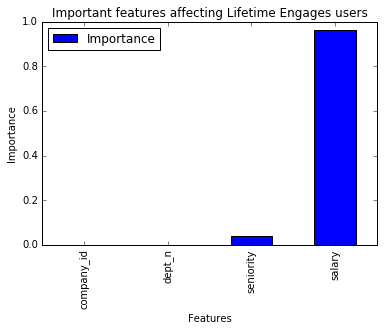

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
importance = dtr.feature_importances_
imp_features = pd.DataFrame({'Features': cols,'Importance': importance})
imp_features.sort(columns='Importance', inplace=True)
imp_features_1 = imp_features.plot(kind='bar')
_ = imp_features_1.set_xticklabels(imp_features['Features'])
_ = imp_features_1.set_xlabel('Features')
_ = imp_features_1.set_ylabel('Importance')
_ = imp_features_1.set_title('Important features affecting Lifetime Engages users')

Salary is clearly the most important feature for employee churn